In [1]:
#creating Visualizations of Wage and Cost Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
CostDF = pd.read_csv('StateCostDF.csv',index_col=0)
WageDF = pd.read_csv('StateWageDF.csv',index_col=0)
#salary and price parity
SalPar = pd.read_csv('combined.csv')

In [4]:
SalPar.rename(columns = {'Standardized Income':'Income v Parity'}, inplace = True)
SalPar.head()

,State,Year,Income,Price Parities,Income v Parity
0,Wyoming,2022,73248.0,91.903,79701.42
1,North Dakota,2022,70360.0,88.656,79362.93
2,Connecticut,2022,82938.0,106.412,77940.46
3,South Dakota,2022,68176.0,87.991,77480.65
4,Massachusetts,2022,84561.0,109.393,77300.19


In [5]:
CostSum = CostDF.where(CostDF['CostType'] != 'Required annual income after taxes').dropna(subset='CostType')
CostSum = CostSum.where(CostSum['CostType'] != 'Required annual income before taxes').dropna(subset='CostType')
CostSum = CostSum.groupby('State').sum()
CostSum.reset_index(inplace=True)
CostSum.head()

,State,1 ADULT - 0,1 ADULT - 1,1 ADULT - 2,1 ADULT - 3,2 ADULTS(1 WORKING) - 0,2 ADULTS(1 WORKING) - 1,2 ADULTS(1 WORKING) - 2,2 ADULTS(1 WORKING) - 3,2 ADULTS(BOTH WORKING) - 0,2 ADULTS(BOTH WORKING) - 1,2 ADULTS(BOTH WORKING) - 2,2 ADULTS(BOTH WORKING) - 3
0,Alabama,32993.034563,61930.312125,76421.658617,99613.683170,51489.926625,67644.445887,85093.524195,97281.598837,51489.926625,69087.783448,87979.976141,101610.847355
1,Alaska,34161.516512,67520.447373,84789.881160,113688.950524,52803.378395,73038.275393,93222.616437,111400.193186,52803.378395,74515.447373,96177.312645,115832.013918
2,Arizona,36156.487428,66947.717365,81331.858797,108157.051030,55362.885828,72966.023725,90629.671967,106406.355926,55362.885828,74299.733393,93297.858797,110409.133533
3,Arkansas,32244.086011,62449.235073,78175.922171,102880.826867,50421.938317,67945.800593,86379.750664,99676.106610,50421.938317,69687.040851,89862.922171,104900.711328
4,California,45474.259096,91483.936928,113832.656346,153331.857250,69255.290699,95873.180990,119690.271296,145370.395042,69255.290699,99327.671669,126599.579909,155733.875518


In [6]:
WageTarg = WageDF.where(WageDF['WageType'] == 'Living Wage').dropna(subset='WageType')
WageTarg.drop(['WageType'],axis=1,inplace=True)
for column in WageTarg.columns:
    if column == 'State':
        continue
    else:
        WageTarg[column] = WageTarg[column].apply(lambda x: x * 40 * 52)


In [7]:
WageTarg.columns

Index(['1 ADULT - 0', '1 ADULT - 1', '1 ADULT - 2', '1 ADULT - 3',
       '2 ADULTS(1 WORKING) - 0', '2 ADULTS(1 WORKING) - 1',
       '2 ADULTS(1 WORKING) - 2', '2 ADULTS(1 WORKING) - 3',
       '2 ADULTS(BOTH WORKING) - 0', '2 ADULTS(BOTH WORKING) - 1',
       '2 ADULTS(BOTH WORKING) - 2', '2 ADULTS(BOTH WORKING) - 3', 'State'],
      dtype='object')

In [8]:
WagevCost = pd.DataFrame(columns=WageTarg.columns)
for column in WageTarg.columns:
    if column == 'State':
        continue
    else:
        Wage = list(WageTarg[column])
        Cost = list(CostSum[column])
        WvC = []
        if 'BOTH WORKING' in str(column):
            for i in range(len(Wage)):
                WvC.append(2*Wage[i] / Cost[i])
        else:
            for i in range(len(Wage)):
                WvC.append(Wage[i] / Cost[i])
        #print(len(WvC))
        WagevCost[column] = [x for x in WvC]
#
#print(adding)

In [9]:
WagevCost.drop(['2 ADULTS(1 WORKING) - 0','2 ADULTS(1 WORKING) - 1',
             '2 ADULTS(1 WORKING) - 2','2 ADULTS(1 WORKING) - 3'],axis=1,inplace=True)
WagevCost['State'] = [x for x in WageTarg['State']]
WagevCost.head()
#map this data in a visualization

,1 ADULT - 0,1 ADULT - 1,1 ADULT - 2,1 ADULT - 3,2 ADULTS(BOTH WORKING) - 0,2 ADULTS(BOTH WORKING) - 1,2 ADULTS(BOTH WORKING) - 2,2 ADULTS(BOTH WORKING) - 3,State
0,1.003694,1.002001,1.001605,1.001250,1.002496,1.001887,1.001401,1.001163,Alabama
1,1.003482,1.001813,1.001461,1.001074,1.002357,1.001639,1.001345,1.001016,Alaska
2,1.003291,1.001826,1.001457,1.001104,1.002483,1.001592,1.001219,1.001050,Arizona
3,1.003856,1.001935,1.001560,1.001215,1.002445,1.001732,1.001400,1.001199,Arkansas
4,1.002611,1.001337,1.001074,1.000795,1.001823,1.001278,1.000970,1.000791,California


In [10]:
WagevCost2 = pd.DataFrame(WagevCost['State'])
WagevCost2['No Children'] = (WagevCost['1 ADULT - 0'] + WagevCost['2 ADULTS(BOTH WORKING) - 0'])/2
WagevCost2['1 Child'] = (WagevCost['1 ADULT - 1'] + WagevCost['2 ADULTS(BOTH WORKING) - 1'])/2
WagevCost2['2 Children'] = (WagevCost['1 ADULT - 2'] + WagevCost['2 ADULTS(BOTH WORKING) - 2'])/2
WagevCost2['3 Children'] = (WagevCost['1 ADULT - 3'] + WagevCost['2 ADULTS(BOTH WORKING) - 3'])/2
WagevCost2['Average'] = (WagevCost2['No Children'] + WagevCost2['1 Child']
                                               + WagevCost2['2 Children'] + WagevCost2['3 Children'])/4
WagevCost2.head(3)

,State,No Children,1 Child,2 Children,3 Children,Average
0,Alabama,1.003095,1.001944,1.001503,1.001206,1.001937
1,Alaska,1.002920,1.001726,1.001403,1.001045,1.001774
2,Arizona,1.002887,1.001709,1.001338,1.001077,1.001753


In [11]:
Top5 = ['Wyoming', 'North Dakota', 'South Dakota', 'Massachusetts']
'''Wyoming: $79,701
North Dakota: $79,363
Connecticut: $77,940
South Dakota: $77,481
Massachusetts: $77,300
'''
Top5CompSci = ['Washington', 'Virginia', 'New York', 'California']
BothTop5 = ['Connecticut']

def coloring(x):
    if x in Top5:
        return 'In Salary v Price Top 5'
    elif x in Top5CompSci:
        return 'Comp Sci Top 5'
    elif x in BothTop5:
        return 'In Both Top 5s'
    else:
        return 'Not in either Top 5'

WagevCost2['Top 5 Best Salary v Price?'] = [coloring(x) for x in WagevCost2['State']]
WagevCost2.head(15)

,State,No Children,1 Child,2 Children,3 Children,Average,Top 5 Best Salary v Price?
0,Alabama,1.003095,1.001944,1.001503,1.001206,1.001937,Not in either Top 5
1,Alaska,1.002920,1.001726,1.001403,1.001045,1.001774,Not in either Top 5
2,Arizona,1.002887,1.001709,1.001338,1.001077,1.001753,Not in either Top 5
3,Arkansas,1.003150,1.001834,1.001480,1.001207,1.001918,Not in either Top 5
4,California,1.002217,1.001307,1.001022,1.000793,1.001335,Comp Sci Top 5
5,Colorado,1.002616,1.001562,1.001175,1.000934,1.001572,Not in either Top 5
6,Connecticut,1.002600,1.001546,1.001232,1.000999,1.001594,In Both Top 5s
7,Delaware,1.002752,1.001661,1.001284,1.001025,1.001680,Not in either Top 5
8,Florida,1.002826,1.001640,1.001328,1.001063,1.001714,Not in either Top 5
9,Georgia,1.002803,1.001799,1.001373,1.001162,1.001784,Not in either Top 5


Text(0, 0.5, 'Average Across All Adults and Children')

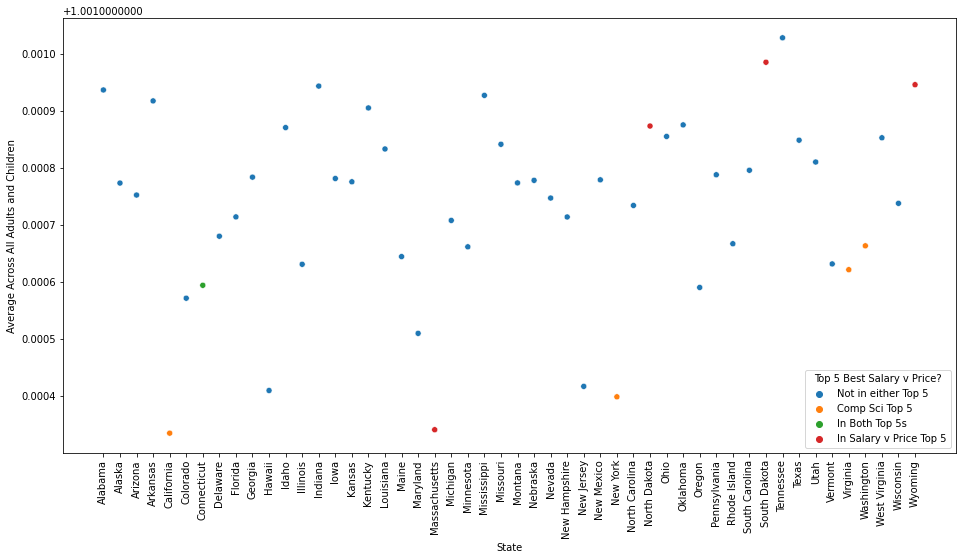

In [12]:
chart = plt.figure(figsize=(16,8))

chart = sns.scatterplot(x = 'State',y='Average',
                data = WagevCost2, hue = 'Top 5 Best Salary v Price?',legend=True)

'''
chart = sns.scatterplot(x = 'State',y='No Children',
                data = WagevCost2, hue = 'Top 5 Best Salary v Price?',legend=True)

chart = sns.scatterplot(x = 'State',y='1 Child',
                data = WagevCost2, hue = 'Top 5 Best Salary v Price?',legend=False)

chart = sns.scatterplot(x = 'State',y='2 Children',
                data = WagevCost2, hue = 'Top 5 Best Salary v Price?',legend=False)

chart = sns.scatterplot(x = 'State',y='3 Children',
                data = WagevCost2, hue = 'Top 5 Best Salary v Price?',legend=False)
'''
chart.tick_params(axis='x', labelrotation=90)
plt.ylabel('Average Across All Adults and Children')

In [13]:
#average the wage and cost data horizontally
#add that to the SalPar dataframe
#map that out

WageTargAvg = WageTarg.copy()
WageTargAvg.drop(['State'],axis=1,inplace=True)
WageTargAvg['Wage Average'] = WageTargAvg.mean(axis=1)
WageTargAvg['State'] = WageTarg['State']
WageTargAvg.drop(['1 ADULT - 0', '1 ADULT - 1', '1 ADULT - 2', '1 ADULT - 3',
       '2 ADULTS(1 WORKING) - 0', '2 ADULTS(1 WORKING) - 1',
       '2 ADULTS(1 WORKING) - 2', '2 ADULTS(1 WORKING) - 3',
       '2 ADULTS(BOTH WORKING) - 0', '2 ADULTS(BOTH WORKING) - 1',
       '2 ADULTS(BOTH WORKING) - 2', '2 ADULTS(BOTH WORKING) - 3'],axis=1,inplace=True)

CostSumAvg = CostSum.copy()
CostSumAvg.drop(['State'],axis=1,inplace=True)
CostSumAvg['Cost Average'] = CostSumAvg.mean(axis=1)
CostSumAvg['State'] = CostSum['State']
CostSumAvg.drop(['1 ADULT - 0', '1 ADULT - 1', '1 ADULT - 2', '1 ADULT - 3',
       '2 ADULTS(1 WORKING) - 0', '2 ADULTS(1 WORKING) - 1',
       '2 ADULTS(1 WORKING) - 2', '2 ADULTS(1 WORKING) - 3',
       '2 ADULTS(BOTH WORKING) - 0', '2 ADULTS(BOTH WORKING) - 1',
       '2 ADULTS(BOTH WORKING) - 2', '2 ADULTS(BOTH WORKING) - 3'],axis=1,inplace=True)

SalPar.set_index('State',inplace=True)
WageTargAvg.set_index('State',inplace=True)
CostSumAvg.set_index('State',inplace=True)
SalPar = SalPar.join(WageTargAvg)
SalPar = SalPar.join(CostSumAvg)
SalPar = SalPar.dropna()
SalPar.reset_index(inplace=True)
SalPar.head(5)

,State,Year,Income,Price Parities,Income v Parity,Wage Average,Cost Average
0,Wyoming,2022,73248.0,91.903,79701.42,57644.119178,74869.406296
1,North Dakota,2022,70360.0,88.656,79362.93,59204.637441,76706.656283
2,Connecticut,2022,82938.0,106.412,77940.46,68752.666667,88998.729167
3,South Dakota,2022,68176.0,87.991,77480.65,56598.034940,73120.760979
4,Massachusetts,2022,84561.0,109.393,77300.19,81475.286446,108528.983286


C:\Users\chrss\AppData\Local\Temp\ipykernel_29876\801494045.py:13: UserWarning: Legend does not support <AxesSubplot:xlabel='State', ylabel='Income v Parity'> instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([chart1, chart2, chart3], ['Income v Parity', 'Wage Average', 'Cost Average'])


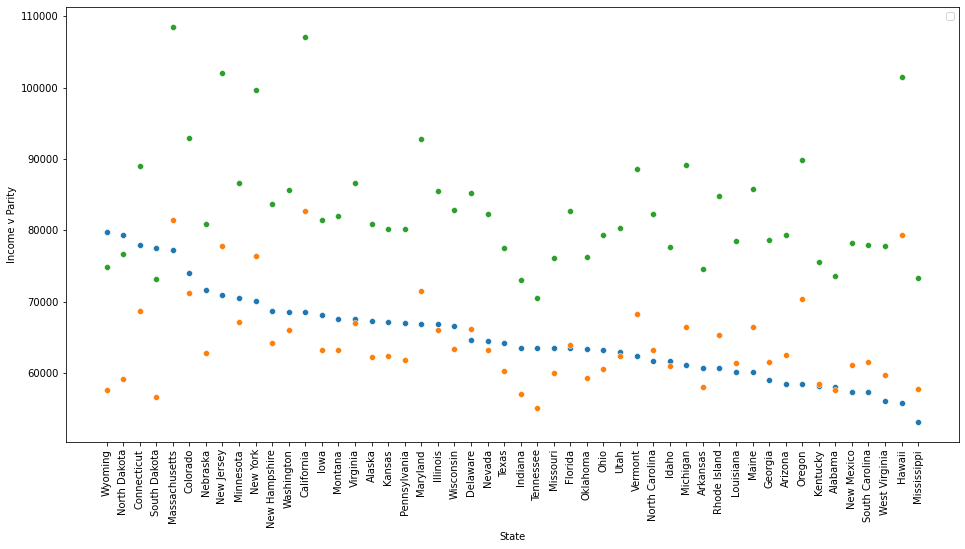

In [22]:
chart = plt.figure(figsize=(16,8))

chart1 = sns.scatterplot(x = 'State',y='Income v Parity',
                data = SalPar, legend=True)

chart2 = sns.scatterplot(x = 'State',y='Wage Average',
                data = SalPar, legend=True)

chart3 = sns.scatterplot(x = 'State',y='Cost Average',
                data = SalPar, legend=True)

chart1.tick_params(axis='x', labelrotation=90)
#plt.legend([chart1, chart2, chart3], ['Income v Parity', 'Wage Average', 'Cost Average'])